# Molecular Maps: TSNE CLustering for POST Trimming

Author: AlvaroVM [https://alvarovm.github.io](http://alvarovm.github.io)
Version: 0.0.1

## Example 1: PCA to distinguish between rings and chains

For this example we define in SMILES string two groups of molecules with different substituents, such as -CH3, -O, -F, -Cl, and- I , in molecules with six carbons 1) in a ring and 2) in chain. Those molecules would be added to a list, additionally we add a 'certain' property , this could be used later as a flag.

In [2]:
import sys
import os
SRC_DIR='../..'

In [3]:
sys.path.append(os.path.join(SRC_DIR, 'code'))
import utils

/home/vama/soft/python-tests/solarcelldata/notebooks/answers/../../code/utils.py:3: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
#https://github.com/jmcarpenter2/swifter
#import swifter
#2-TSNE-UMAP-map-cuda-Copy1

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs 
from rdkit.Chem import Draw
from rdkit.Chem.rdMolDescriptors import  GetHashedMorganFingerprint
from rdkit.DataStructs import ConvertToNumpyArray

from sklearn.manifold import TSNE

import hdbscan

utils.plot_settings2()

results_path = os.path.join(SRC_DIR,'results')

In [5]:
df = pd.read_pickle('../../data/extended_db_Zindo_Nov_2019_V5_cannfp.pkl').fillna(value = 0)
print('Column names: {}'.format(str(df.columns.tolist())))
print('Table Shape: {}'.format(df.shape))
#df.head(2)

Column names: ['smiles', 'inchikey', 'fpfail', 'smi_pre', 'smi_post', 'lambda_sTDA (nm)', 'f1_sTDA', 'lumo_dft', 'homo_dft', 'dmom_dft (D)', 'lambda_z (nm)', 'f1_z', 'lumo_z', 'homo_z', 'dmom_z (D)', 'lumo_mopac', 'homo_mopac', 'dmom_mopac (D)', 'lambda_tddft (nm)', 'f1_tddft', 'lambda_exp_max (nm)', 'epsilon_exp_max ', 'lambda_exp_min (nm)', 'epsilon_exp_min ', 'solvent', 'nogood', 'nogoodpost', 'mol', 'morganfps-b', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'gapdft', 'gapz', 'gapmopac']
Table Shape: (7177, 49)


In [ ]:

df = pd.read_pickle('../data/extended_db_Zindo_Nov_2019_V5_cannfp_clust.pkl').fillna(value = 0)
print('Column names: {}'.format(str(df.columns.tolist())))
print('Table Shape: {}'.format(df.shape))
#df.head(2)

In [ ]:
#tag='lambda_exp_max (nm)'
tag='lambda_sTDA (nm)'
df=df[df['lambda_sTDA (nm)']<600]
df=df[df['lambda_sTDA (nm)']>250]
print('Table Shape: {}'.format(df.shape))

In [9]:
tag='lambda_sTDA (nm)'
df=df[df['lambda_sTDA (nm)']<400]
df=df[df['lambda_sTDA (nm)']>380]
print('Table Shape: {}'.format(df.shape))

Table Shape: (298, 55)


In [10]:
#df = df[df['lambda_sTDA (nm)']>0]

We load *rdkit*  and *numpy* 

In [11]:
X=df['morganfps-b8'].values.tolist()

In [12]:
X = np.array(X, order='C')

In [13]:
#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
#tsne = TSNE(n_components=2, metric=tanimoto_dist,perplexity=50)

tsne = TSNE(n_components=2, metric='jaccard',perplexity=50, init='pca',n_iter=1000)
#tsne = TSNE(n_components=2, metric='jaccard',perplexity=50, n_iter=250)
#tsne = TSNE(n_components=2, metric='jaccard',perplexity=50, n_iter=1000, init='pca', random_state=0)

tsne_X = tsne.fit_transform(X)

/home/vama/anaconda3/envs/introhpc/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2181: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


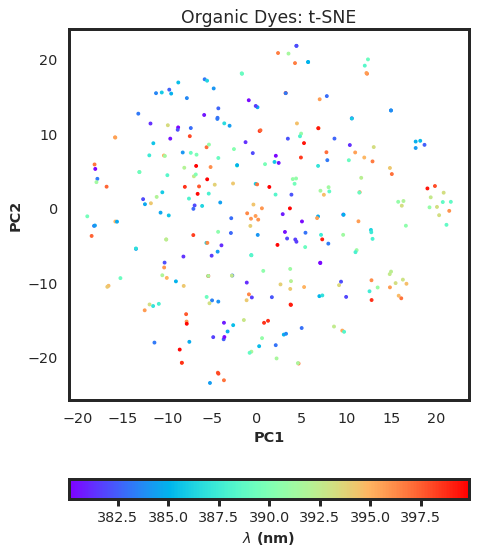

In [14]:
plt.figure(figsize=(6,8))
plt.scatter(tsne_X.T[0], tsne_X.T[1], marker='o',c=df[ 'lambda_sTDA (nm)'].values[:],s=5, cmap='rainbow')

#plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], 
#             color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Organic Dyes: t-SNE')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label(r'$\lambda$ (nm)')
#cbar.ax.set_ylabel('Cluster Id',rotation=270,labelpad=25)
utils.save_figure(results_path,'tsne-dyes')
plt.show()

### Cluster analysis

In [15]:
cluster_tsne = hdbscan.HDBSCAN(min_cluster_size=15
                               , gen_min_span_tree=True)

In [16]:
cluster_tsne.fit(tsne_X)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=15)

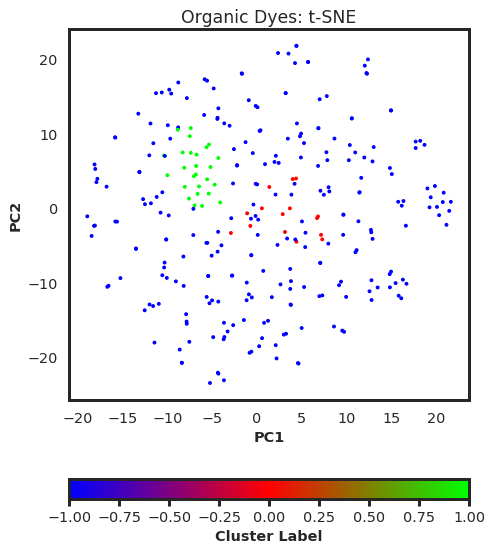

In [17]:
plt.figure(figsize=(6,8))
plt.scatter(tsne_X.T[0], tsne_X.T[1], marker='o',c=cluster_tsne.labels_,s=5, cmap='brg')
#plt.scatter(tsne_X.T[0], df[ 'lambda_sTDA (nm)'][x_index].values[:]  , marker='o',c=cluster_tsne.labels_,s=50, cmap='hsv')
        

#plt.scatter(X_skernpca[y==1, 0], X_skernpca[y==1, 1], 
#             color='blue', marker='o', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Organic Dyes: t-SNE')
cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Cluster Label')
plt.show()

In [18]:
import seaborn as sns
sns.set_context("paper")
#sns.set_style('white')
sns.set(style='white', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)
pal = sns.color_palette('bright', len(cluster_tsne.labels_))
#pal=sns.color_palette()

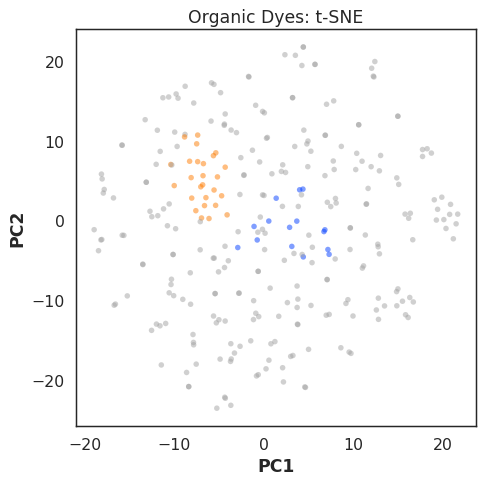

In [19]:
plt.figure(figsize=(6,6))
plot_kwds={'alpha':.5, 's':20, 'linewidths':.1}
colors = [sns.desaturate(pal[col], sat) for col, sat in zip(cluster_tsne.labels_,
                                                            cluster_tsne.probabilities_)]
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Organic Dyes: t-SNE')
plt.scatter(tsne_X.T[0], tsne_X.T[1], c=colors, **plot_kwds)
#cbar = plt.colorbar(orientation='horizontal')
#cbar.set_label('Cluster probability')
utils.save_figure(results_path,'tsne-color-cluster')
plt.show()

### Add cluster to Dataframe

In [20]:
df['cluster']=cluster_tsne.labels_
df['clusterprob']=cluster_tsne.probabilities_

/tmp/ipykernel_44059/3399701654.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_tsne.probabilities_,bins=40)


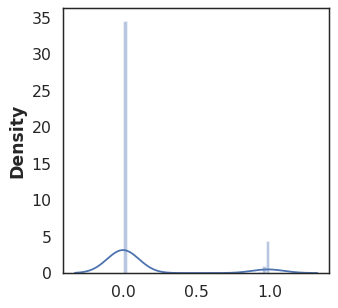

In [21]:
#np.sort(df.cluster.unique())
plt.figure(figsize=(4,4))
sns.distplot(cluster_tsne.probabilities_,bins=40)
plt.show()

In [22]:
#conc = np.vstack(cluster_tsne.labels_)
#cluster_tsne.labels_.flatten()
#df['cluster']=pd.DataFrame(conc)
#df[df['cluster']== 2]

In [23]:
print('Total number of clusters found = {}'.format(df.cluster.unique().shape[0]))

Total number of clusters found = 3


/tmp/ipykernel_44059/1929155953.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[df.cluster > -1].cluster,bins=df.cluster.unique().shape[0]-1,kde=False, vertical=True)


2


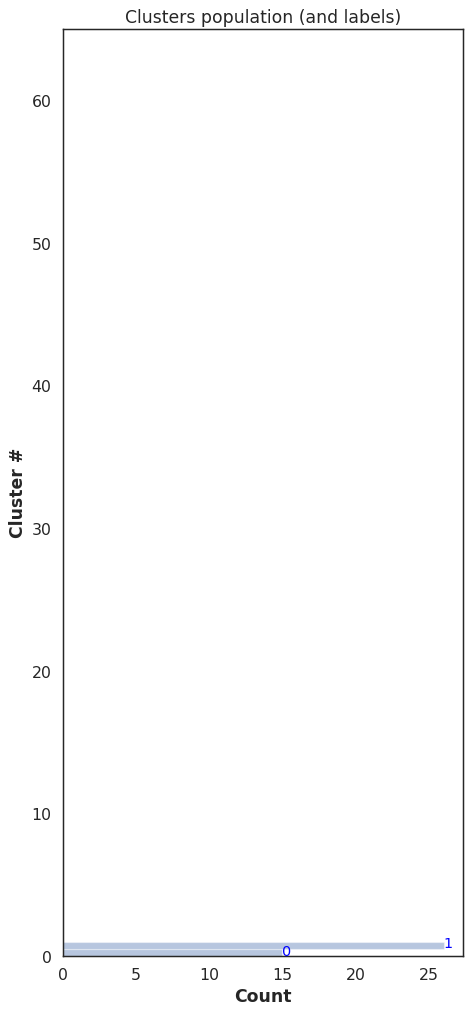

In [24]:
#df[df.cluster > 0].cluster
plt.figure(figsize=(6,14))
ax=sns.distplot(df[df.cluster > -1].cluster,bins=df.cluster.unique().shape[0]-1,kde=False, vertical=True)
#ax=sns.distplot(df.cluster,bins=df.cluster.unique().shape[0]-1,kde=False)

ax.set_ylim([0,65])

s = 0

for p in ax.patches:
    s+= p.get_height()

for key, p in enumerate(ax.patches): 
    ax.text(p.get_width(),
        p.get_y() - p.get_height()/4., 
            '{}'.format(key), 
            fontsize=12,
            color='blue',
            ha='left',
            va='bottom')
    
print(len(ax.patches))
plt.xlabel(r'Count')
plt.ylabel('Cluster #')
plt.title('Clusters population (and labels)')
utils.save_figure(results_path,'cluster-population')
plt.show()

/tmp/ipykernel_44059/754584778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[df.cluster > -1].cluster,bins=df.cluster.unique().shape[0]-1,kde=False, vertical=True)


2


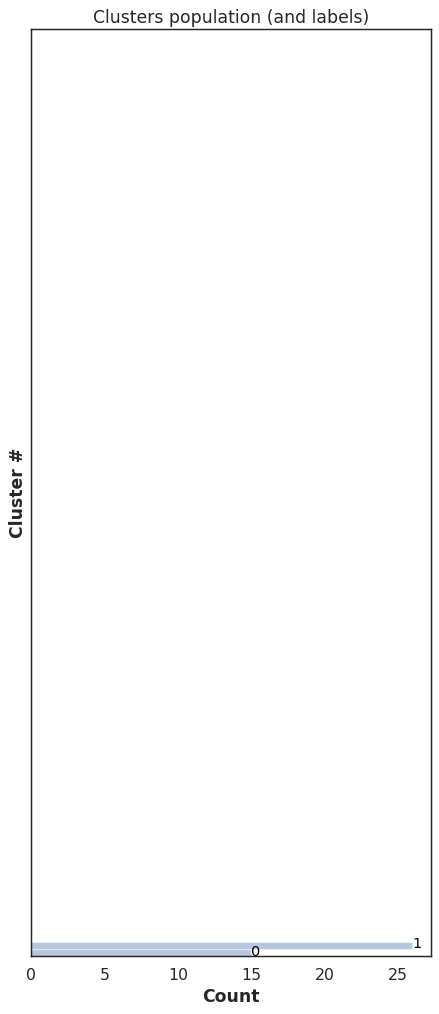

In [25]:
#df[df.cluster > 0].cluster
plt.figure(figsize=(6,14))
ax=sns.distplot(df[df.cluster > -1].cluster,bins=df.cluster.unique().shape[0]-1,kde=False, vertical=True)
#ax=sns.distplot(df.cluster,bins=df.cluster.unique().shape[0]-1,kde=False)

ax.set_ylim([0,65])




s = 0

for p in ax.patches:
    s+= p.get_height()

for key, p in enumerate(ax.patches): 
    ax.text(p.get_width(),
        p.get_y() - p.get_height()/4., 
            '{}'.format(key), 
            fontsize=12,
            color='black',
            ha='left',
            va='bottom')
    
print(len(ax.patches))

plt.yticks([], [])
plt.xlabel(r'Count')
plt.ylabel('Cluster #')
plt.title('Clusters population (and labels)')
utils.save_figure(results_path,'cluster-population-ver')
plt.show()

### Size of each cluster

In [26]:
counts = df.cluster.value_counts()
counts

cluster
-1    257
 1     26
 0     15
Name: count, dtype: int64

### Plot the first 8 clusters more populated

/tmp/ipykernel_44059/747506634.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df[df['cluster']==e]['lambda_sTDA (nm)'].values, hist=False,kde_kws={"shade": True},label=label)
/home/vama/anaconda3/envs/introhpc/lib/python3.11/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/tmp/ipykernel_44059/747506634.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your 

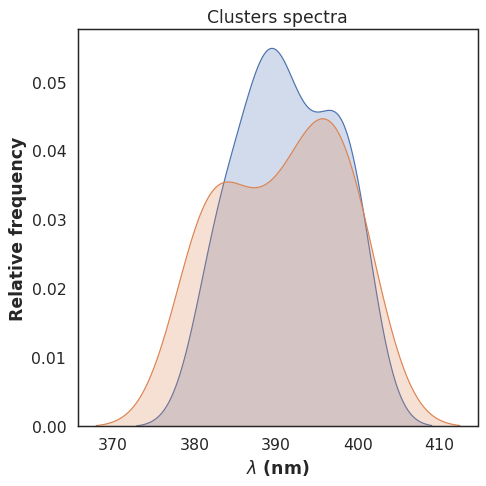

In [27]:
## Draw.MolsToGridImage(df[df['cluster']==1]]
import matplotlib as mpl
fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax=[]
names=[]
for e in counts[1:8].keys():
    label='Cluster {}'.format(e)
    ax=sns.distplot(df[df['cluster']==e]['lambda_sTDA (nm)'].values, hist=False,kde_kws={"shade": True},label=label)
    #names.append('Cluster {}'.format(e))

plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel('Relative frequency')
plt.title('Clusters spectra')

utils.save_figure(results_path,'cluster-spectra')
#ax.legend(names)
#header_legend('',  title='Clusters', loc='upper right',bbox_to_anchor=(1.15,1.0))
plt.show()

In [28]:
tag=23
mollist=df[df['cluster']==tag].mol[0:6].tolist()
stalist=df[df['cluster']==tag]['lambda_sTDA (nm)'][0:6].tolist()
lengend=[r'{} nm'.format(x) for x in stalist]
#Draw.MolsToGridImage(mollist,lengends=[r'{}'.format(x) for x in stalist])
svg = Draw.MolsToGridImage(mollist, molsPerRow=3, subImgSize=(150,150), legends=lengend ,useSVG=True)

#svg = MolsToGridImage(mol_list, molsPerRow=5,useSVG=True)
utils.save_molgrid(svg, results_path,'sample-cluster23')
utils.display_svg(svg)

ExpatError: not well-formed (invalid token): line 1, column 1

In [ ]:
#kwargs={'alpha':.25, 's':50, 'linewidths':.1}
kwargs={}
#smart='c1ccc(cc1)-[#7](-c1ccccc1)-c1ccccc1'
smart='c1ccc(cc1)-[#7](-c1ccccc1)-c1ccccc1'
tag=23
mollist=df[df['cluster']==tag].mol[0:6].tolist()
stalist=df[df['cluster']==tag]['lambda_sTDA (nm)'][0:6].tolist()
lengend=[r'{} nm'.format(x) for x in stalist]
#Draw.MolsToGridImage(mollist,lengends=[r'{}'.format(x) for x in stalist])
#https://rdkit.blogspot.com/2015/02/new-drawing-code.html
svg = Draw.MolsToGridImage(mollist, molsPerRow=3, subImgSize=(350,350),
                           highlightAtomLists=[mol.GetSubstructMatch(Chem.MolFromSmarts(smart)) for mol in mollist],
                           legends=lengend ,useSVG=True, **kwargs)

#svg = MolsToGridImage(mol_list, molsPerRow=5,useSVG=True)
utils.save_molgrid(svg, results_path,'sample-cluster23-highligh')
utils.display_svg(svg)


In [16]:
[mol.GetSubstructMatch(Chem.MolFromSmarts(smart)) for mol in mollist]

[(16, 17, 18, 19, 33, 34, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32),
 (20, 21, 22, 23, 37, 38, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36),
 (11, 12, 13, 14, 28, 29, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27)]

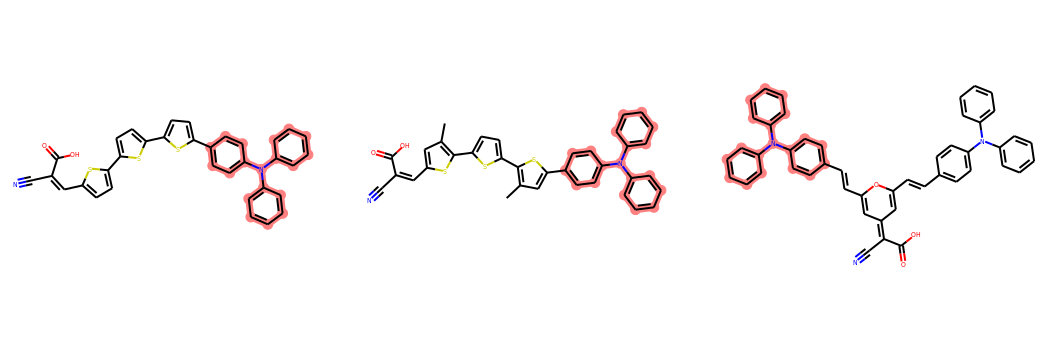

In [19]:
lengend=[r'{} nm'.format(x) for x in stalist]
Draw.MolsToGridImage(mollist, molsPerRow=3, subImgSize=(350,350),
                     highlightAtomLists=[mol.GetSubstructMatch(Chem.MolFromSmarts(smart)) for mol in mollist])
#utils.save_molgrid(svg, results_path,'sample-cluster23-highligh1')
#utils.display_svg(svg)

In [129]:
lengend

['413.6 nm', '397.1 nm', '376.0 nm']

In [95]:
?Draw.MolsToGridImage

Signature:
Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(200, 200),
    legends=None,
    highlightAtomLists=None,
    highlightBondLists=None,
    useSVG=False,
    **kwargs,
)
Docstring: <no docstring>
File:      ~/install/local/anaconda3/envs/jacquimaps36/lib/python3.6/site-packages/rdkit/Chem/Draw/__init__.py
Type:      function


In [55]:
#lamdas=np.array([df[ 'lambda_sTDA (nm)'][x_index].values[e] if v>0. else 0 for e, v in enumerate(cluster_tsne.probabilities_)])
lamdas=np.array([df[ 'lambda_sTDA (nm)'].values[e] if v>0.8 else 200. for e, v in enumerate(cluster_tsne.probabilities_)])

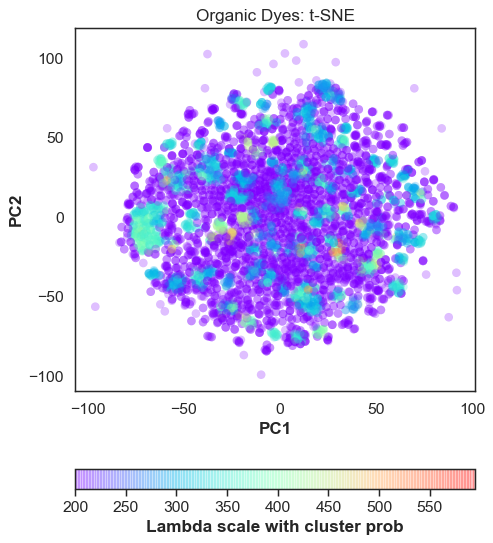

In [56]:
plt.figure(figsize=(6,8))
plot_kwds={'alpha':.25, 's':50, 'linewidths':.1}

#plt.scatter(tsne_X.T[0], tsne_X.T[1], c=df[ 'lambda_sTDA (nm)'].values[:], cmap='rainbow' )
plt.scatter(tsne_X.T[0], tsne_X.T[1], c=lamdas[:], cmap='rainbow', **plot_kwds )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Organic Dyes: t-SNE')

cbar = plt.colorbar(orientation='horizontal')
cbar.set_label('Lambda scale with cluster prob')
plt.show()

In [58]:
dfc=df[df['cluster']>0][['smiles','cluster']]

In [59]:
dfc.to_csv('smilencluster.csv', index=False, quoting=0)

## Save new data file

In [60]:
print('Column names: {}'.format(str(df.columns.tolist())))
print('Table Shape: {}'.format(df.shape))
#df.head(2)

Column names: ['smiles', 'inchikey', 'fpfailp', 'fpfail', 'smi_pre', 'lambda_sTDA (nm)', 'f1_sTDA', 'lumo_dft', 'homo_dft', 'dmom_dft (D)', 'lambda_z (nm)', 'f1_z', 'lumo_z', 'homo_z', 'dmom_z (D)', 'lumo_mopac', 'homo_mopac', 'dmom_mopac (D)', 'lambda_tddft (nm)', 'f1_tddft', 'lambda_exp_max (nm)', 'epsilon_exp_max ', 'lambda_exp_min (nm)', 'epsilon_exp_min ', 'solvent', 'nogood', 'nogoodp', 'mol', 'molp', 'morganfps-b', 'morganfps-b8', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'MolWt', 'MolWtp', 'gapdft', 'gapmopac', 'gapz', 'cluster', 'clusterprob']
Table Shape: (6485, 55)


In [133]:
df.to_pickle('../data/extended_db_Zindo_Nov_2019_V5_cannfp_clust.pkl')

## Butina analysis of a cluster

In [1]:
def ClusterFps(fps,cutoff=0.2):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])

    # now cluster the data:
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs

In [5]:
df = pd.read_pickle('../data/extended_db_Zindo_Nov_2019_V5_cannfp_clust.pkl').fillna(value = 0)
print('Column names: {}'.format(str(df.columns.tolist())))
print('Table Shape: {}'.format(df.shape))
#df.head(2)

Column names: ['smiles', 'inchikey', 'fpfailp', 'fpfail', 'smi_pre', 'lambda_sTDA (nm)', 'f1_sTDA', 'lumo_dft', 'homo_dft', 'dmom_dft (D)', 'lambda_z (nm)', 'f1_z', 'lumo_z', 'homo_z', 'dmom_z (D)', 'lumo_mopac', 'homo_mopac', 'dmom_mopac (D)', 'lambda_tddft (nm)', 'f1_tddft', 'lambda_exp_max (nm)', 'epsilon_exp_max ', 'lambda_exp_min (nm)', 'epsilon_exp_min ', 'solvent', 'nogood', 'nogoodp', 'mol', 'molp', 'morganfps-b', 'morganfps-b8', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'MolWt', 'MolWtp', 'gapdft', 'gapmopac', 'gapz', 'cluster', 'clusterprob']
Table Shape: (6485, 55)


### Take one cluster, for example Cluster # 23

In [9]:
tag=23
minidf=df[df['cluster']==tag]
moles=minidf.mol.tolist()
print('Number of molecules in Cluster #{} = {}'.format(tag,len(moles)))

Number of molecules in Cluster #23 = 282


In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem
ms = moles
fps = [AllChem.GetMorganFingerprintAsBitVect(x,8,2048) for x in ms]

In [11]:
clusters=ClusterFps(fps,cutoff=0.6)
print('Total number of clusters found by Butina = {}'.format(len(clusters)))

Total number of clusters found by Butina = 149


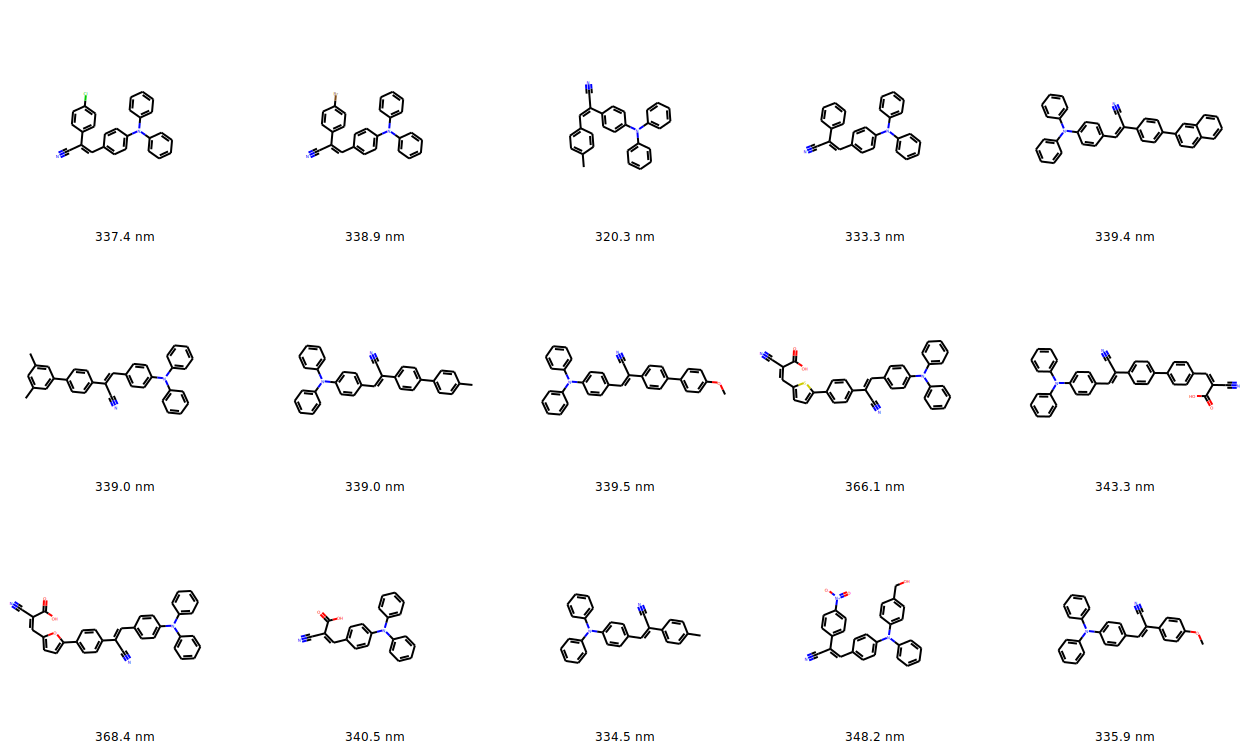

In [17]:
num_cluster= 0
mollist=[minidf.mol.iloc[e] for e in clusters[num_cluster] ]
stalist=[minidf['lambda_sTDA (nm)'].iloc[e] for e in clusters[num_cluster] ]
lengend=[r'{} nm'.format(x) for x in stalist]
svg = Draw.MolsToGridImage(mollist[0:15], molsPerRow=5, subImgSize=(250,250), 
                                                   legends=lengend, useSVG=True  )

#svg = MolsToGridImage(mol_list, molsPerRow=5,useSVG=True)
utils.save_molgrid(svg, results_path,'butina-on-cluster23')
utils.display_svg(svg)

In [27]:
num_cluster=0
for e in clusters[num_cluster]:
    print(minidf.smiles.iloc[e])

N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)c1ccc(Cl)cc1
N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)c1ccc(Br)cc1
Cc1ccc(C=C(C#N)c2ccc(N(c3ccccc3)c3ccccc3)cc2)cc1
N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)c1ccccc1
N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)c1ccc(-c2ccc3ccccc3c2)cc1
Cc1cc(C)cc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)c1
Cc1ccc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)cc1
COc1ccc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)cc1
N#CC(=Cc1ccc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)s1)C(=O)O
N#CC(=Cc1ccc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)cc1)C(=O)O
N#CC(=Cc1ccc(-c2ccc(C(C#N)=Cc3ccc(N(c4ccccc4)c4ccccc4)cc3)cc2)o1)C(=O)O
N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)C(=O)O
Cc1ccc(C(C#N)=Cc2ccc(N(c3ccccc3)c3ccccc3)cc2)cc1
N#CC(=Cc1ccc(N(c2ccccc2)c2ccc(CO)cc2)cc1)c1ccc([N+](=O)[O-])cc1
COc1ccc(C(C#N)=Cc2ccc(N(c3ccccc3)c3ccccc3)cc2)cc1
N#CC(=Cc1ccc(N(c2ccccc2)c2ccccc2)cc1)c1ccc(-c2ccccc2)cc1


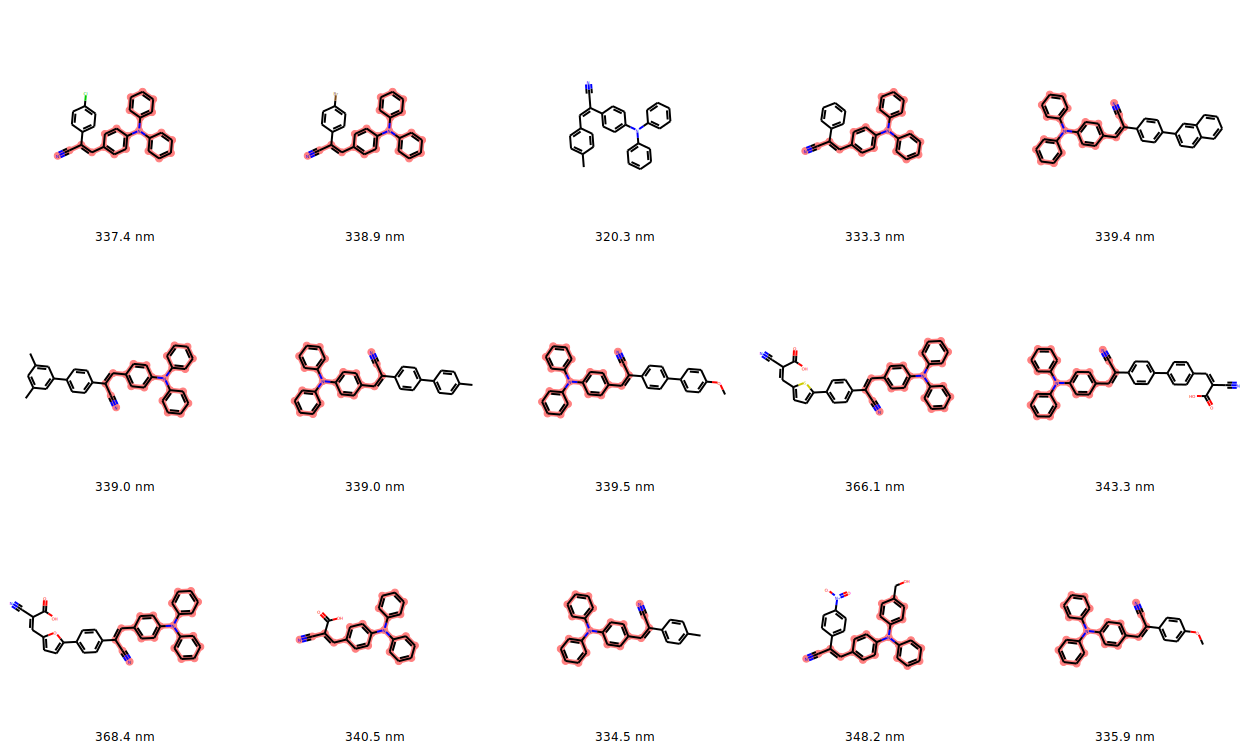

In [81]:
num_cluster= 0
#smart gotten from https://chem-space.com/search
smart='N#C[#6]=[#6]-c1ccc(cc1)-[#7](-c1ccccc1)-c1ccccc1'
mollist=[minidf.mol.iloc[e] for e in clusters[num_cluster] ]
stalist=[minidf['lambda_sTDA (nm)'].iloc[e] for e in clusters[num_cluster] ]
lengend=[r'{} nm'.format(x) for x in stalist]
svg = Draw.MolsToGridImage(mollist[0:15], molsPerRow=5, subImgSize=(250,250),  
                           highlightAtomLists=[mol.GetSubstructMatch(Chem.MolFromSmarts(smart)) for mol in mollist],
                           legends=lengend,useSVG=True)

#svg = MolsToGridImage(mol_list, molsPerRow=5,useSVG=True)
utils.save_molgrid(svg, results_path,'butina-on-cluster23-highligh')
utils.display_svg(svg)